In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 38.4MB/s]
100% 1.06G/1.06G [00:09<00:00, 121MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
directory = '/content/train',
labels = 'inferred',    # label_mode='int' not supported to new keras
batch_size = 32,
image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
directory = '/content/test',
labels = 'inferred',
batch_size = 32,
image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize: because we want all pixel values between 0 and 1

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#CNN model :
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
#binary_crossentropy :binary classification problem(cat vs dog)
# The code is failing because the model.compile() method does not accept the metrices parameter.
#The metrices parameter is only valid for the Sequential model.

#model.compile(optimizer='adam',loss='binary_crossentropy',metrices=['accuracy'])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')


In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 1.2494 - val_loss: 0.6591
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5678 - val_loss: 0.5808
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4943 - val_loss: 0.5228
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4354 - val_loss: 0.4714
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3668 - val_loss: 0.4288
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2978 - val_loss: 0.4571
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2151 - val_loss: 0.5423
Epoch 8/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1473 - val_loss: 0.6104
Epoch 9/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1028 - val_loss: 1.1966
Epoch 10/10
625/625 [==============================] - 65s 103ms/step - l

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

NameError: name 'model' is not defined

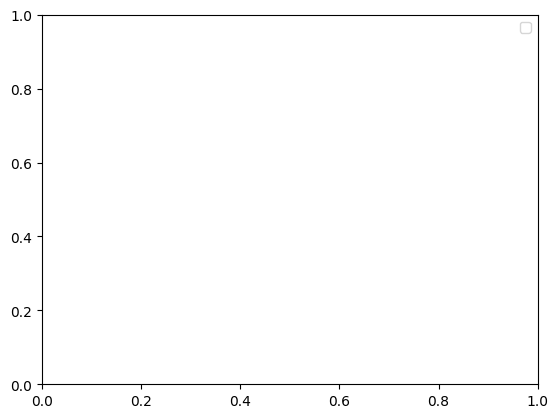

In [ ]:
import matplotlib.pyplot as plt

if 'val_accuracy' in history.history:
  plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

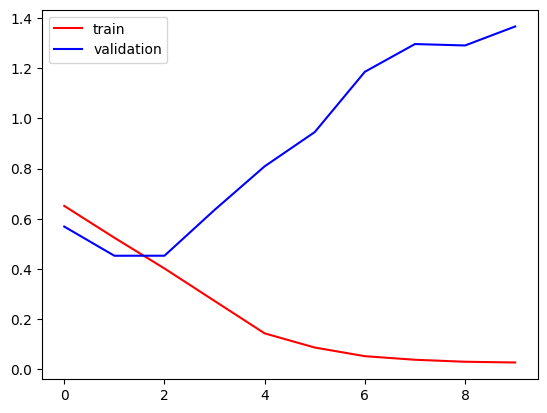

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

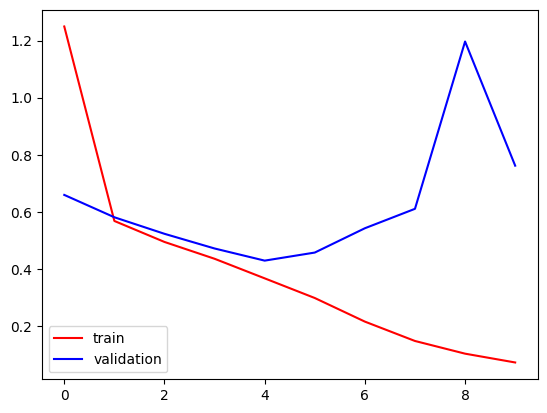

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting :
 # Add more data
 # Data augmentation
 # L1/L2 Regularizer
 # **Dropout**
 # **Batch Norm**
 # Reduce complexity


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

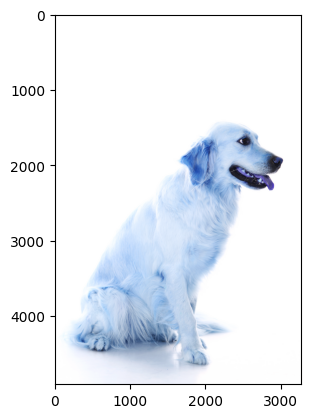

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(4910, 3273, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)   # 0 specifies dog

1/1 [==============================] - 0s 485ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

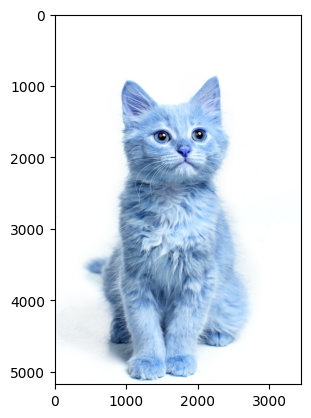

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(5178, 3452, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)